In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import cv2
import pandas as pd
import shutil
import imutils

In [5]:
# Import Data_Set
!wget https://www.dropbox.com/s/wz5da7z5ns3i89o/Brain_Tumor_Dataset.zip?dl=0

--2023-01-25 15:16:02--  https://www.dropbox.com/s/wz5da7z5ns3i89o/Brain_Tumor_Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wz5da7z5ns3i89o/Brain_Tumor_Dataset.zip [following]
--2023-01-25 15:16:02--  https://www.dropbox.com/s/raw/wz5da7z5ns3i89o/Brain_Tumor_Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf85074f55491b01a93c3c5cae1.dl.dropboxusercontent.com/cd/0/inline/B1NpC0EkKbc5rQCqjgu7jMADuhpYnQisIGg86H2hDHBymAXBpZ0fuTmVTSNDDRLo1dGa8kyafLRbU2DR1CFVqlGbHOVRxn8L71iN6jU9v8a0RJYcVkc2P0LErVHFdJi38I0Jia6ArK_ZZNpcODhT7OVI8ilG4cr3l7FIYc4kNT_k9A/file# [following]
--2023-01-25 15:16:03--  https://ucf85074f55491b01a93c3c5cae1.dl.dropboxusercontent.com/cd/0/inline/B1NpC0EkKbc5rQCqjgu7jMADuhpYnQisIGg86H2hDH

In [6]:
# Unzip the dataset file 
!unzip "/content/Brain_Tumor_Dataset.zip?dl=0"

Archive:  /content/Brain_Tumor_Dataset.zip?dl=0
   creating: Brain_Tumor_Dataset/Brain_Tumor/
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y0.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y10.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y100.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1000.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1001.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1002.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1003.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1004.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1005.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1006.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1007.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1008.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1009.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y101.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/y1010.jpg  
  in

In [7]:
ROOT="/content/Brain_Tumor_Dataset"
num_imgs={}
for dir in os.listdir(ROOT):
  # print("dir",os.listdir(os.path.join(ROOT,dir)))
  num_imgs[dir]=len(os.listdir(os.path.join(ROOT,dir)))
num_imgs

{'Brain_Tumor': 1500, 'Healthy': 1500}

In [8]:
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT,dir) ) , size=(math.floor(70/100 * num_imgs[dir])-10) , replace=False):
     
      O=os.path.join(ROOT,dir,img)
      D=os.path.join("./train",dir)
      # print("O",O)
      # print("D",D)

      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train folder exists")

In [9]:
if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT):
    os.makedirs("./val/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT,dir) ) , size=(math.floor(15/100 * num_imgs[dir])-5) , replace=False):
     
      O=os.path.join(ROOT,dir,img)
      D=os.path.join("./val/",dir)
      # print("O",O)
      # print("D",D)

      shutil.copy(O,D)
      os.remove(O)
else:
  print("Val folder exists")

In [10]:
if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT):
    os.makedirs("./test/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT,dir) ) , size=(math.floor(15/100 * num_imgs[dir])-5) , replace=False):
     
      O=os.path.join(ROOT,dir,img)
      D=os.path.join("./test/",dir)
      # print("O",O)
      # print("D",D)

      shutil.copy(O,D)
      os.remove(O)
else:
  print("Test folder exists")

In [11]:
from keras.layers.pooling.global_average_pooling2d import  GlobalAvgPool2D
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers.regularization.spatial_dropout3d import Dropout
from keras.layers.pooling.max_pooling2d import MaxPool2D,MaxPooling2D
from keras.layers.convolutional.conv2d_transpose import Conv2D
from keras.layers import Dense,Conv2D,Flatten, MaxPool2D,Dropout,BatchNormalization,MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
import keras


In [12]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=['accuracy'])


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [13]:
train_gen=image.ImageDataGenerator(
    zoom_range=0.2,shear_range=0.2,rescale=1./255,horizontal_flip=True
)
val_datagen=image.ImageDataGenerator(rescale=1./255)
test_datagen=image.ImageDataGenerator(rescale=1./255)

In [14]:
train_data=train_gen.flow_from_directory(directory="/content/train",target_size=(224,224),batch_size=32,class_mode='binary')

Found 2080 images belonging to 2 classes.


In [15]:
train_data.class_indices

{'Brain_Tumor': 0, 'Healthy': 1}

In [16]:
val_data=val_datagen.flow_from_directory(directory="/content/val",target_size=(224,224),batch_size=32,class_mode='binary')

Found 440 images belonging to 2 classes.


In [17]:
test_data=test_datagen.flow_from_directory(directory="/content/test",target_size=(224,224),batch_size=32,class_mode='binary')

Found 440 images belonging to 2 classes.


In [18]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,mode='auto')

mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',verbose=1,save_best_only=False,mode='auto')

callback=[es,mc]

In [19]:
hist=model.fit_generator(generator=train_data,steps_per_epoch=5,epochs=10,verbose=1,validation_data=val_data,validation_steps=15,callbacks=callback)

<ipython-input-19-bd8f1fddebdb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(generator=train_data,steps_per_epoch=5,epochs=10,verbose=1,validation_data=val_data,validation_steps=15,callbacks=callback)


Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 0.8115 - accuracy: 0.6187


Epoch 1: saving model to best_model.h5
5/5 [==============================] - 44s 9s/step - loss: 0.8115 - accuracy: 0.6187 - val_loss: 0.6250 - val_accuracy: 0.7409
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 0.6474 - accuracy: 0.6625


Epoch 2: saving model to best_model.h5
5/5 [==============================] - 24s 5s/step - loss: 0.6474 - accuracy: 0.6625
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 0.6162 - accuracy: 0.6562


Epoch 3: saving model to best_model.h5
5/5 [==============================] - 25s 5s/step - loss: 0.6162 - accuracy: 0.6562
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 0.5929 - accuracy: 0.7063


Epoch 4: saving model to best_model.h5
5/5 [==============================] - 24s 5s/step - loss: 0.5929 - accuracy: 0.7063
Epoch 5/10
5/5 [==============================] - ETA: 0s - loss: 0.6233 - accuracy: 0.6438


Epoch 5: saving model to best_model.h5
5/5 [==============================] - 24s 5s/step - loss: 0.6233 - accuracy: 0.6438
Epoch 6/10
5/5 [==============================] - ETA: 0s - loss: 0.6134 - accuracy: 0.6687


Epoch 6: saving model to best_model.h5
5/5 [==============================] - 24s 5s/step - loss: 0.6134 - accuracy: 0.6687
Epoch 7/10
5/5 [==============================] - ETA: 0s - loss: 0.5485 - accuracy: 0.7312


Epoch 7: saving model to best_model.h5
5/5 [==============================] - 24s 5s/step - loss: 0.5485 - accuracy: 0.7312
Epoch 8/10
5/5 [==============================] - ETA: 0s - loss: 0.6012 - accuracy: 0.7375


Epoch 8: saving model to best_model.h5
5/5 [==============================] - 24s 5s/step - loss: 0.6012 - accuracy: 0.7375
Epoch 9/10
5/5 [==============================] - ETA: 0s - loss: 0.5445 - accuracy: 0.7125


Epoch 9: saving model to best_model.h5
5/5 [==============================] - 24s 5s/step - loss: 0.5445 - accuracy: 0.7125
Epoch 10/10
5/5 [==============================] - ETA: 0s - loss: 0.5431 - accuracy: 0.6812


Epoch 10: saving model to best_model.h5
5/5 [==============================] - 27s 5s/step - loss: 0.5431 - accuracy: 0.6812


In [20]:
from keras.models import load_model
import keras.utils as image
model=load_model("/content/best_model.h5")

In [21]:
acc=model.evaluate_generator(generator=test_data)[1]

print(f"The accuracy of your model is = {acc*100} %")

<ipython-input-21-ca652e4b2982>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(generator=test_data)[1]


The accuracy of your model is = 75.22727251052856 %


In [22]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

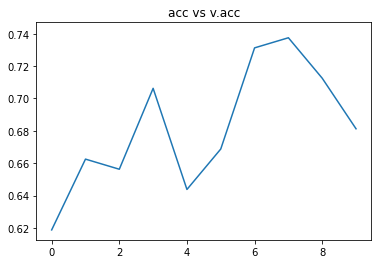

In [23]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title("acc vs v.acc")
plt.show()

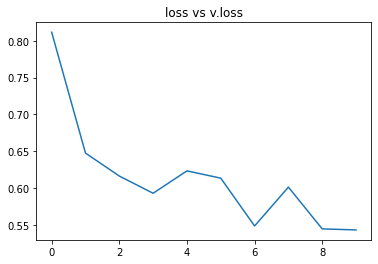

In [24]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title("loss vs v.loss")
plt.show()

In [28]:
path="/content/val/Brain_Tumor/y1109.jpg"
img=image.load_img(path,target_size=(224,224), )

i=image.img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape

# pred=model.predict_classes(input_arr)[0][0]
pred = (model.predict(input_arr)[0][0])
print(model.predict(input_arr)[0][0])
if pred<0.5:
  print("The image shows the presence of Tumor")
else:
  print("The image is Healthy brain")  

1/1 [==============================] - 0s 53ms/step
0.17905237
The image shows the presence of Tumor
